## Uploading the data, combining the 12 files for the months into one large dataset, and adding a column for the months

In [25]:
# reading csv files
# cleaning

import os
import glob
import pandas as pd

class ReadCSV:
    # Initialising class with parent directory
    def __init__(self, parent_dir): 
        self.parent_dir = parent_dir
        os.chdir(parent_dir)
        self.folder = os.path.join(self.parent_dir) # folder where data retrieve are stored

    # Turning csvs to dataframe, each csv as an item in a list
    def list_of_dfs(self): 
        maindfs = []
        monthdfs = []
        os.chdir(self.folder +'/data')
        for file_name in glob.glob('*.csv'):
            month = file_name.split("- ")[1].split(".")[0] #getting the month from the csv file name
            x = pd.read_csv(file_name, header=1,engine='python', skipfooter =4) #making the first row the header 
            x.dropna(how='all', axis=1, inplace=True) #drop empty columns
            x["Month"] = month #getting the month into a column, with header "Month"
            num_lines = len(x)
            y = pd.read_csv(file_name, header = 1, engine='python', skiprows=range(0,num_lines+3))
            y.dropna(how='all', axis=1, inplace=True) #drop empty columns
            y["Month"] = month #getting the month into a column, with header "Month"
            y.rename(columns={'Event ID': 'Total Events'}, inplace=True) #rename column
            maindfs.append(x)
            monthdfs.append(y)
        return maindfs, monthdfs #list of csvs

    # Turning all the indv month dataframes into one big data frame
    def merged_dfs(self): 
        maindfs, monthdfs  = self.list_of_dfs()
        mainmergeddf  = pd.concat(maindfs)
        monthmergeddf = pd.concat(monthdfs)
        return mainmergeddf, monthmergeddf
    
    def download_mergedfiles(self):
        maindf, summarydf = self.merged_dfs()
        filename = "daily_run_sheets.csv"
        maindf.to_csv(os.path.join(self.folder, filename), index=False)
        filename = "summary.csv"
        summarydf.to_csv(os.path.join(self.folder, filename), index=False)
        
class Main:
    def __init__(self):
        return
    
    def get_dataframe(self, parentdir):
        csvs = ReadCSV(parentdir)
        return csvs.merged_dfs()
    
    def download_mergedfiles(self, parentdir):
        csvs = ReadCSV(parentdir)
        return csvs.download_mergedfiles()

# Getting data
main = Main()
data, summary = main.get_dataframe("/Users/belladavies/Desktop/predicting-food-waste") #put your own directory here
main.download_mergedfiles("/Users/belladavies/Desktop/predicting-food-waste")
print(len(data))
data

5285


,Event ID,Guest Count,Building Room,Street Address,SuppliesTime,Food Time,Event Start Time,End Time,Tier,Drop Steward,Pick Up Steward,Event Manager,Month
0,143732,1,GSU,775 Comm Ave,6:30 AM,6:30 AM,6:30 AM,6:30 AM,1,Luis,NO P/U,NaN,September 2022
1,143733,1,GSU,775 Comm Ave,6:30 AM,6:30 AM,6:30 AM,6:30 AM,1,Antonio,NO P/U,NaN,September 2022
2,143734,1,GSU,775 Comm Ave,6:30 AM,6:30 AM,6:30 AM,6:30 AM,1,Luis,NO P/U,NaN,September 2022
3,143735,1,GSU,775 Comm Ave,6:30 AM,6:30 AM,6:30 AM,6:30 AM,1,Luis,NO P/U,NaN,September 2022
4,143736,1,GSU,775 Comm Ave,6:30 AM,6:30 AM,6:30 AM,6:30 AM,1,Luis,NO P/U,NaN,September 2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,146286,25,The Castle,225 Bay State Rd,6:00 PM,7:00 PM,8:00 PM,9:30 PM,3,Jordan,Jordan,NEEDS MANAGER,November 2022
498,148250,100,Tsai Center Lobby,685 Commonwealth Ave,5:30 PM,5:15 PM,8:00 PM,9:30 PM,3,Jamal,Jamal,Lynn,November 2022
499,148347,100,906,8 St Marys,6:00 PM,7:00 PM,8:00 PM,10:00 PM,2,Jordan,Jordan,Conor,November 2022
500,148385,70,Castle,225 Bay State Rd,7:45 PM,7:45 PM,8:30 PM,9:30 PM,1,Jamal,Jamal,NaN,November 2022


## Cleaning the data

In [26]:
# Cleaning Street Addresses

counts_before = data.groupby(['Street Address']).count().sort_values(by=['Event ID'])
# Make addresses upper case, strip extra space at the end, replace periods and apostraphes with nothing
data['Street Address'] = data['Street Address'].str.upper().str.strip().str.replace('.', '').str.replace("'", '')
# Remove various street addresses
data = data[data['Street Address'] != 'VARIOUS']

# Show counts of street addresses
counts_after = data.groupby(['Street Address']).count().sort_values(by=['Event ID'])
print("Fixed: " + str(len(counts_before) - len(counts_after)) + " values")
counts_after
#data

Fixed: 161 values


/var/folders/_y/c4dslfps1sbdl5snj_x8s0mc0000gn/T/ipykernel_29765/2714646330.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Street Address'] = data['Street Address'].str.upper().str.strip().str.replace('.', '').str.replace("'", '')


,Event ID,Guest Count,Building Room,SuppliesTime,Food Time,Event Start Time,End Time,Tier,Drop Steward,Pick Up Steward,Event Manager,Month
Street Address,,,,,,,,,,,,
820 COMMONWEALTH AVENUE,1,1,1,1,1,1,1,1,1,1,1,1
GSU PLAZA,1,1,1,1,1,1,1,1,1,0,0,1
GSU TO CANES,1,1,1,1,1,1,1,1,1,1,0,1
635 COMMM AVE,1,1,1,1,1,1,1,1,1,0,0,1
96 BAY STATE RD,1,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
580 COMM AVE,152,152,152,152,152,152,152,152,152,151,0,152
610 COMM AVE,194,194,194,194,194,194,194,194,190,151,33,194
8 ST MARYS,243,243,243,243,242,243,243,243,243,192,41,243


In [27]:
# Fixing typos

for i in range(len(data['Street Address'])):
    # Commonwealth Ave 
    if data['Street Address'].iloc[i] == "595 COMMONWEALTH AVE - QUESTROM" or data['Street Address'].iloc[i] == "595 COMMONWEALTH AVE" or data['Street Address'].iloc[i] == "595 COMMONWEALTH AVENUE":
        data['Street Address'].iloc[i] = "595 COMM AVE"
    if data['Street Address'].iloc[i] == "610 COMM AVE - KILACHAND" or data['Street Address'].iloc[i] == "610 COMM AVE/COM LAWN" or data['Street Address'].iloc[i] == "610 COMM" or data['Street Address'].iloc[i] == "610 COMMONWEALTH AVE":
        data['Street Address'].iloc[i] = "610 COMM AVE"
    if data['Street Address'].iloc[i] == "635 COMMM AVE" or data['Street Address'].iloc[i] == "635 COMMM" or data['Street Address'].iloc[i] == "635 COMMMONWEALTH AVE" or data['Street Address'].iloc[i] == "635 COMM" or data['Street Address'].iloc[i] == "635 COMMONWEALTH AVE":
        data['Street Address'].iloc[i] = "635 COMM AVE"
    if data['Street Address'].iloc[i] == "755 COMM AVE - NEWBURY CENTER":
        data['Street Address'].iloc[i] = "755 COMM AVE"
    if data['Street Address'].iloc[i] == "765 COMM AVE>" or data['Street Address'].iloc[i] == "765 COMM VE" or data['Street Address'].iloc[i] == "765 COMM AVE4" or data['Street Address'].iloc[i] == "765 COMM AVE - REDSTONE" or data['Street Address'].iloc[i] == "765 COMMONWEALTH AVE":
        data['Street Address'].iloc[i] = "765 COMM AVE"
    if data['Street Address'].iloc[i] == "775 COMM AE" or data['Street Address'].iloc[i] == "775 COMM AVE-" or data['Street Address'].iloc[i] == "775 COMMONWEALLTH AVENUE" or data['Street Address'].iloc[i] == "775 COMMONWEALTH AVE":
        data['Street Address'].iloc[i] = "775 COMM AVE"
    if data['Street Address'].iloc[i] == "808 COMM AVE>" or data['Street Address'].iloc[i] == "HOWARD THURMAN CENTER ROOM 104" or data['Street Address'].iloc[i] == "808 COMMONWEALTH AVE - THURMAN CENTER":
        data['Street Address'].iloc[i] = "808 COMM AVE"
    if data['Street Address'].iloc[i] == "820 COMM" or data['Street Address'].iloc[i] == "BOOTH PLAZA" or data['Street Address'].iloc[i] == "BOOTH THEATRE" or data['Street Address'].iloc[i] == "820 COMM AVE (BOOTH)" or data['Street Address'].iloc[i] == "820 COMMONWEALTH AVENUE":
        data['Street Address'].iloc[i] = "820 COMM AVE"
    if data['Street Address'].iloc[i] == "855 COMM" or data['Street Address'].iloc[i] == "855 COMM AV E":
        data['Street Address'].iloc[i] = "855 COMM AVE"
    if data['Street Address'].iloc[i] == "871 COM AVE":
        data['Street Address'].iloc[i] = "871 COMM AVE"
    if data['Street Address'].iloc[i] == "881 COMM AVE-WEST ENTRANCE" or data['Street Address'].iloc[i] == "881 COMM AVE (WEST ENTRANCE)" :
        data['Street Address'].iloc[i] = "871 COMM AVE"
    if data['Street Address'].iloc[i] == "890 COMMONWEALTH AVE":
        data['Street Address'].iloc[i] = "890 COMM AVE"
    if data['Street Address'].iloc[i] == "915 COMMONWEALTH AVENUE" or data['Street Address'].iloc[i] == "915 COMM" or data['Street Address'].iloc[i] == "915 COMM AVE FITREC" or data['Street Address'].iloc[i] == "915 FIT REC":
        data['Street Address'].iloc[i] = "915 COMM AVE"
    if data['Street Address'].iloc[i] == "925 COMM":
        data['Street Address'].iloc[i] = "925 COMM AVE"
    if data['Street Address'].iloc[i] == "928 COMM AVE -AGGANIS ARENA":
        data['Street Address'].iloc[i] = "928 COMM AVE"
    if data['Street Address'].iloc[i] == "940 COMM AVE (PLEASANT ST ENTRANCE)":
        data['Street Address'].iloc[i] = "940 COMM AVE"
    if data['Street Address'].iloc[i] == "985 COMM":
        data['Street Address'].iloc[i] = "985 COMM AVE"
    
    # Bay State Road
    if data['Street Address'].iloc[i] == "53 BAY STATE ROAD":
        data['Street Address'].iloc[i] = "53 BAY STATE RD"
    if data['Street Address'].iloc[i] == "91 BAY ST RD" or data['Street Address'].iloc[i] == "91 BAY STATE" or data['Street Address'].iloc[i] == "91 BAY STATE ROAD":
        data['Street Address'].iloc[i] = "91 BAY STATE RD"    
    if data['Street Address'].iloc[i] == "100 BSR" or data['Street Address'].iloc[i] == "100 BAY STATE RD" or data['Street Address'].iloc[i] == "100 BAY ST" or data['Street Address'].iloc[i] == "100BSR" or data['Street Address'].iloc[i] == "100 BAY ST RD" or data['Street Address'].iloc[i] == "100 BAY STATE ROAD" or data['Street Address'].iloc[i] == "100 BAY STATE":
        data['Street Address'].iloc[i] = "100 BAY STATE RD"    
    if data['Street Address'].iloc[i] == "121 BAY STATE" or data['Street Address'].iloc[i] == "121 BSR" or data['Street Address'].iloc[i] == "121 BAY STATE ROAD":
        data['Street Address'].iloc[i] = "121 BAY STATE RD"
    if data['Street Address'].iloc[i] == "125 BAY STATE" or data['Street Address'].iloc[i] == "125 BAY STATE RC":
        data['Street Address'].iloc[i] = "125 BAY STATE RD"
    if data['Street Address'].iloc[i] == "TOWERS LAWN" or data['Street Address'].iloc[i] == "140 BSR":
        data['Street Address'].iloc[i] = "140 BAY STATE"
    if data['Street Address'].iloc[i] == "141 BAY ST" or data['Street Address'].iloc[i] == "141 BAY STATE ROAD" or data['Street Address'].iloc[i] == "141 BAY STATE":
        data['Street Address'].iloc[i] = "141 BAY STATE RD"
    if data['Street Address'].iloc[i] == "213 BAY STATE ROAD - HILLEL HOUSE":
        data['Street Address'].iloc[i] = "213 BAY STATE"
    if data['Street Address'].iloc[i] == "213 BAY ST RD" or data['Street Address'].iloc[i] == "213 BAYSTATE ROAD":
        data['Street Address'].iloc[i] = "213 BAY STATE"
    if data['Street Address'].iloc[i] == "225 BAY STTAE RD" or data['Street Address'].iloc[i] == "225 BAY ST":
        data['Street Address'].iloc[i] = "225 BAY STATE"
    if data['Street Address'].iloc[i] == "233 BAY STATE ROAD":
        data['Street Address'].iloc[i] = "233 BAY STATE"
    if data['Street Address'].iloc[i] == "232 BAY ST RD":
        data['Street Address'].iloc[i] = "232 BAY STATE"
    if data['Street Address'].iloc[i] == "ALPERT MALL/BU BEACH" or data['Street Address'].iloc[i] == "BU BEACH" or data['Street Address'].iloc[i] == "270 BAY STATE"or data['Street Address'].iloc[i] == "270 BAY STATE ROAD":
        data['Street Address'].iloc[i] = "270 BAY STATE"
        
    if data['Street Address'].iloc[i] == "10 BUICK ST TOWER 1" or data['Street Address'].iloc[i] == "10 BUICK S" or data['Street Address'].iloc[i] == "10 BUCK ST" or data['Street Address'].iloc[i] == "10 BUICK ST TOWER 1" or data['Street Address'].iloc[i] == "10 BUICK" or data['Street Address'].iloc[i] == "10 BUICK STREET":
        data['Street Address'].iloc[i] = "10 BUICK ST"
    
        
    if data['Street Address'].iloc[i] == "10 LENNOX ST" or data['Street Address'].iloc[i] == "10 LENOX":
        data['Street Address'].iloc[i] = "10 LENOX ST"
    
    if data['Street Address'].iloc[i] == "1 SILBUR WAY":
        data['Street Address'].iloc[i] = "1 SILBER WAY"
        
    if data['Street Address'].iloc[i] == "1 UNIVERSITY ROAD":
        data['Street Address'].iloc[i] = "1 UNIVERSITY RD"
        
    if data['Street Address'].iloc[i] == "8 ST MARYS STREET" or data['Street Address'].iloc[i] == "8 STMARY'S" or data['Street Address'].iloc[i] == "8 ST MARY'S S" or data['Street Address'].iloc[i] == "8 SAINT MARYS" or data['Street Address'].iloc[i] == "8 ST MARY'S ST" or data['Street Address'].iloc[i] == "8 ST MARY'S":
        data['Street Address'].iloc[i] = "8 ST MARYS"
    if data['Street Address'].iloc[i] == "15 ST MARYS ST" or data['Street Address'].iloc[i] == "15 ST MARY’S STREET, EMB 105":
        data['Street Address'].iloc[i] = "15 ST MARYS"
        
    if data['Street Address'].iloc[i] == "635 ALBANY STREET":
        data['Street Address'].iloc[i] = "635 ALBANY ST"
    if data['Street Address'].iloc[i] == "179 AMORY STREET":
        data['Street Address'].iloc[i] = "179 AMORY ST"
        
    if data['Street Address'].iloc[i] == "120 ASHFORD STREET":
        data['Street Address'].iloc[i] = "120 ASHFORD ST" 
    
    if data['Street Address'].iloc[i] == "277 BABCOCK STREET":
        data['Street Address'].iloc[i] = "277 BABCOCK ST"
    if data['Street Address'].iloc[i] == "285 BABCOCK - NICKERSON FIELD" or data['Street Address'].iloc[i] == "CASE CENTER -285 BABCOCK ST" or data['Street Address'].iloc[i] == "CASE GYM" or data['Street Address'].iloc[i] == "VARIOUS - END AT WALTER BROWN ARENA, 285 BABCOCK" or data['Street Address'].iloc[i] == "285 BABCOCK - CASE CENTER" or data['Street Address'].iloc[i] == "285 BABCOCK STREET - TENNIS COURTS" or data['Street Address'].iloc[i] == "285 BABCOCK STREET":
        data['Street Address'].iloc[i] = "285 BABCOCK ST"
    if data['Street Address'].iloc[i] == "300 W BABCOCK ST (ENTRANCE IN BACK OF BLDG ON ASHFORD ST)" or data['Street Address'].iloc[i] == "300 BABCOCK":
        data['Street Address'].iloc[i] = "300 BABCOCK ST"
        
    if data['Street Address'].iloc[i] == "5 CUMMINGTON" or data['Street Address'].iloc[i] == "5 CUMMINGTON MALL RD":
        data['Street Address'].iloc[i] = "5 CUMMINGTON MALL" 
    if data['Street Address'].iloc[i] == "44 CUMMINGTON":
        data['Street Address'].iloc[i] = "44 CUMMINGTON MALL" 
    if data['Street Address'].iloc[i] == "100 CUMMINGTON" or data['Street Address'].iloc[i] == "100 CUMMINGTON AVE":
        data['Street Address'].iloc[i] = "100 CUMMINGTON MALL"
    if data['Street Address'].iloc[i] == "110 CUMMINGTON":
        data['Street Address'].iloc[i] = "110 CUMMINGTON MALL"
    if data['Street Address'].iloc[i] == "111 CUMMINGTON" or data['Street Address'].iloc[i] == "111 CUMMINGTON STREET":
        data['Street Address'].iloc[i] = "111 CUMMINGTON MALL"
        
    if data['Street Address'].iloc[i] == "100 E NEWTON" or data['Street Address'].iloc[i] == "100 E NEWTON ST" or data['Street Address'].iloc[i] == "100 EAST NEWTON":
        data['Street Address'].iloc[i] = "100 EAST NEWTON ST"
        
    if data['Street Address'].iloc[i] == "43 HAWES" or data['Street Address'].iloc[i] == "43 HAWES STREET" or data['Street Address'].iloc[i] == "43 HAWEST ST":
        data['Street Address'].iloc[i] = "43 HAWEST ST" 
    if data['Street Address'].iloc[i] == "33 HARRY AGGANIS":
        data['Street Address'].iloc[i] = "33 HARRY AGGANIS WAY"
    
counts = data.groupby(['Street Address']).count().sort_values(by=["Event ID", "Street Address"], ascending=False)
#pd.set_option('display.max_rows', None)
print("This step fixed " + str(len(counts_after)-len(counts)) + " values")
print("Total values fixed: " + str(len(counts_before) - len(counts)) + " values")
counts#.head(50)#.sort_values(by=["Street Address"])


/var/folders/_y/c4dslfps1sbdl5snj_x8s0mc0000gn/T/ipykernel_29765/4004786943.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Street Address'].iloc[i] = "43 HAWEST ST"
/var/folders/_y/c4dslfps1sbdl5snj_x8s0mc0000gn/T/ipykernel_29765/4004786943.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Street Address'].iloc[i] = "225 BAY STATE"
/var/folders/_y/c4dslfps1sbdl5snj_x8s0mc0000gn/T/ipykernel_29765/4004786943.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

This step fixed 108 values
Total values fixed: 269 values


,Event ID,Guest Count,Building Room,SuppliesTime,Food Time,Event Start Time,End Time,Tier,Drop Steward,Pick Up Steward,Event Manager,Month
Street Address,,,,,,,,,,,,
775 COMM AVE,934,934,934,904,904,934,934,931,925,564,158,934
765 COMM AVE,468,468,468,467,467,468,468,468,468,368,69,468
8 ST MARYS,294,294,294,294,293,294,294,294,294,237,50,294
610 COMM AVE,202,202,202,202,202,202,202,202,198,156,34,202
580 COMM AVE,152,152,152,152,152,152,152,152,152,151,0,152
...,...,...,...,...,...,...,...,...,...,...,...,...
180 RIVERWAY,1,1,1,1,1,1,1,1,1,1,0,1
140 COMM AVE,1,1,1,1,1,1,1,1,1,1,1,1
100 BAY STATE RD,1,1,1,1,1,1,1,1,1,1,1,1


## Adding columns for event duration and number of meals

In [28]:
# Function to find event durations

import numpy as np
def duration_total(df_name,start_timecol,end_timecol):
    duration = []
    start_time = np.array(df_name[start_timecol])#.str.strip()
    end_time = np.array(df_name[end_timecol])#.str.strip()
    for i in df_name.index:
        
        if start_time[i] == '0' or end_time[i] == '0' or start_time[i] == None or end_time[i] == None or type(start_time[i]) != str or type(end_time[i]) != str:
       
            duration += [0]
    
        else:
            #print(start_time[i])
            #print(start_time[i].split(' '))
            start_hrmin, start_period = map(str.strip, start_time[i].split(' '))
            start_hour, start_minute = map(str.strip, start_hrmin.split(':'))

            if end_time[i] == "12:01:30 AM":
                end_hour = "12"
                end_minute = "1"
                end_period = "AM"

            else: 
            #print(end_time[i])
            #print(end_time[i].split(' '))
                end_hrmin, end_period = map(str.strip, end_time[i].split(' '))
                end_hour = end_hrmin.split(':')[0].strip()
                end_minute = end_hrmin.split(':')[1].strip()


            start_hour = int(start_hour)
            start_minute = int(start_minute)
            end_hour = int(end_hour)
            end_minute = int(end_minute)

            # Convert hours to 24-hour format if necessary
            if start_period == 'PM' and start_hour != 12:
                start_hour += 12
            if start_period == 'AM' and start_hour == 12:
                start_hour += 12
            if end_period == 'AM' and end_hour == 12:
                end_hour += 12
            if end_period == 'PM' and end_hour != 12:
                end_hour += 12

            # Calculate time difference in minutes
            start_time_minutes = start_hour * 60 + start_minute
            end_time_minutes = end_hour * 60 + end_minute
            time_diff = end_time_minutes - start_time_minutes

            if time_diff < 0: #events with negative duration values (count as overnight)
                time_diff += 60*24

            duration += [time_diff]
        
    df_name["Event Duration (hrs)"] = np.round(np.array(duration)/60.0,2)
    return df_name

# Calling the duration_total function to add duration column
data_w_duration = duration_total(data,"Event Start Time", "End Time")
data = data_w_duration

# Function to predict number of meals served at an event given the event duration,
# Using the estimation of one meal every 4 hours

def meals(data):
    num_meals = []
    for i in range(len(data)):
        if 0.00 <= data["Event Duration (hrs)"].iloc[i] < 4.00:
            num_meals = np.append(num_meals, 1)
        if 4.00 <= data["Event Duration (hrs)"].iloc[i] < 8.00:
            num_meals = np.append(num_meals, 2)
        if 8.00 <= data["Event Duration (hrs)"].iloc[i] < 12.00:
            num_meals = np.append(num_meals, 3)
        if 12.00 <= data["Event Duration (hrs)"].iloc[i] < 16.00:
            num_meals = np.append(num_meals, 4)
        if 16.00 <= data["Event Duration (hrs)"].iloc[i] < 24.00:
            num_meals = np.append(num_meals, 3)
    return num_meals

# Calling the meals function to add meals column
data["Number of Meals"] = meals(data)
data

/var/folders/_y/c4dslfps1sbdl5snj_x8s0mc0000gn/T/ipykernel_29765/3352270526.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_name["Event Duration (hrs)"] = np.round(np.array(duration)/60.0,2)
/var/folders/_y/c4dslfps1sbdl5snj_x8s0mc0000gn/T/ipykernel_29765/3352270526.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Number of Meals"] = meals(data)


,Event ID,Guest Count,Building Room,Street Address,SuppliesTime,Food Time,Event Start Time,End Time,Tier,Drop Steward,Pick Up Steward,Event Manager,Month,Event Duration (hrs),Number of Meals
0,143732,1,GSU,775 COMM AVE,6:30 AM,6:30 AM,6:30 AM,6:30 AM,1,Luis,NO P/U,NaN,September 2022,0.0,1.0
1,143733,1,GSU,775 COMM AVE,6:30 AM,6:30 AM,6:30 AM,6:30 AM,1,Antonio,NO P/U,NaN,September 2022,0.0,1.0
2,143734,1,GSU,775 COMM AVE,6:30 AM,6:30 AM,6:30 AM,6:30 AM,1,Luis,NO P/U,NaN,September 2022,0.0,1.0
3,143735,1,GSU,775 COMM AVE,6:30 AM,6:30 AM,6:30 AM,6:30 AM,1,Luis,NO P/U,NaN,September 2022,0.0,1.0
4,143736,1,GSU,775 COMM AVE,6:30 AM,6:30 AM,6:30 AM,6:30 AM,1,Luis,NO P/U,NaN,September 2022,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,146286,25,The Castle,225 BAY STATE RD,6:00 PM,7:00 PM,8:00 PM,9:30 PM,3,Jordan,Jordan,NEEDS MANAGER,November 2022,1.5,1.0
498,148250,100,Tsai Center Lobby,685 COMMONWEALTH AVE,5:30 PM,5:15 PM,8:00 PM,9:30 PM,3,Jamal,Jamal,Lynn,November 2022,3.0,1.0
499,148347,100,906,8 ST MARYS,6:00 PM,7:00 PM,8:00 PM,10:00 PM,2,Jordan,Jordan,Conor,November 2022,1.0,1.0
500,148385,70,Castle,225 BAY STATE RD,7:45 PM,7:45 PM,8:30 PM,9:30 PM,1,Jamal,Jamal,NaN,November 2022,2.0,1.0


## Adding a column for the waste predictions for each event

In [29]:
# Adding a column for waste prediction using number of guests and number of meals

data["Lbs Waste"] = data["Guest Count"]*0.45*data["Number of Meals"]

data.to_csv(os.path.join('/Users/belladavies/Desktop', 'data'), index=False)
data


/var/folders/_y/c4dslfps1sbdl5snj_x8s0mc0000gn/T/ipykernel_29765/244419697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Lbs Waste"] = data["Guest Count"]*0.45*data["Number of Meals"]


,Event ID,Guest Count,Building Room,Street Address,SuppliesTime,Food Time,Event Start Time,End Time,Tier,Drop Steward,Pick Up Steward,Event Manager,Month,Event Duration (hrs),Number of Meals,Lbs Waste
0,143732,1,GSU,775 COMM AVE,6:30 AM,6:30 AM,6:30 AM,6:30 AM,1,Luis,NO P/U,NaN,September 2022,0.0,1.0,0.45
1,143733,1,GSU,775 COMM AVE,6:30 AM,6:30 AM,6:30 AM,6:30 AM,1,Antonio,NO P/U,NaN,September 2022,0.0,1.0,0.45
2,143734,1,GSU,775 COMM AVE,6:30 AM,6:30 AM,6:30 AM,6:30 AM,1,Luis,NO P/U,NaN,September 2022,0.0,1.0,0.45
3,143735,1,GSU,775 COMM AVE,6:30 AM,6:30 AM,6:30 AM,6:30 AM,1,Luis,NO P/U,NaN,September 2022,0.0,1.0,0.45
4,143736,1,GSU,775 COMM AVE,6:30 AM,6:30 AM,6:30 AM,6:30 AM,1,Luis,NO P/U,NaN,September 2022,0.0,1.0,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,146286,25,The Castle,225 BAY STATE RD,6:00 PM,7:00 PM,8:00 PM,9:30 PM,3,Jordan,Jordan,NEEDS MANAGER,November 2022,1.5,1.0,11.25
498,148250,100,Tsai Center Lobby,685 COMMONWEALTH AVE,5:30 PM,5:15 PM,8:00 PM,9:30 PM,3,Jamal,Jamal,Lynn,November 2022,3.0,1.0,45.00
499,148347,100,906,8 ST MARYS,6:00 PM,7:00 PM,8:00 PM,10:00 PM,2,Jordan,Jordan,Conor,November 2022,1.0,1.0,45.00
500,148385,70,Castle,225 BAY STATE RD,7:45 PM,7:45 PM,8:30 PM,9:30 PM,1,Jamal,Jamal,NaN,November 2022,2.0,1.0,31.50


## Group data by building and month

In [31]:
# Group data by street address and month, to see the number of events (count) and total waste (sum)

groups = data.groupby(['Street Address', 'Month']).agg({'Lbs Waste': ['count', 'sum']})#.sort_values(by=['count'])
groups[('Lbs Waste Weekly', 'count')] = np.array(groups[('Lbs Waste', 'count')])/4
groups[('Lbs Waste Weekly', 'sum')] = np.array(groups[('Lbs Waste', 'sum')])/4
groups[('Tons Waste Weekly', 'sum')] = np.array(groups[('Lbs Waste Weekly', 'sum')]) * 0.0005
groups

Lbs Waste          Lbs Waste Weekly  \
                                           count      sum            count   
Street Address          Month                                                
0                        April 2022            4    23.85             1.00   
                         December 2022         1    18.00             0.25   
                         July 2022             1     0.45             0.25   
                         May 2022              2     0.90             0.50   
                         October 2022          4    34.65             1.00   
...                                          ...      ...              ...   
WEST CAMPUS             June 2022              4  1066.50             1.00   
WEST CAMPUS DINING HALL  April 2022            1     1.35             0.25   
                        June 2022             13   708.75             3.25   
WEST CAMPUS GROTTO       April 2022            9   282.60             2.25   
                        June 2022              1    93.15             0.25   

                                                 Tons Waste Weekly  
                                             sum               sum  
Street Address          Month                                       
0                        April 2022       5.9625          0.002981  
                         December 2022    4.5000          0.002250  
                         July 2022        0.1125          0.000056  
                         May 2022         0.2250          0.000113  
                         October 2022     8.6625          0.004331  
...                                          ...               ...  
WEST CAMPUS             June 2022       266.6250          0.133313  
WEST CAMPUS DINING HALL  April 2022       0.3375          0.000169  
                        June 2022       177.1875          0.088594  
WEST CAMPUS GROTTO       April 2022      70.6500          0.035325  
                        June 2022        23.2875          0.011644  

[939 rows x 5 columns]

In [32]:
# Chart of all observations surpassing the weekly threshold

above_limit = groups.loc[groups[('Tons Waste Weekly', 'sum')] >= 0.5]

# Average number of events for those that passed the threshold
prediction = np.mean(above_limit[('Lbs Waste Weekly', 'count')][0:5])
print(prediction)

above_limit.head(5)

21.75


Lbs Waste           Lbs Waste Weekly             \
                                  count       sum            count        sum   
Street Address Month                                                            
775 COMM AVE    April 2022          117   6940.35            29.25  1735.0875   
                October 2022        124   7902.90            31.00  1975.7250   
               June 2022             72   5938.20            18.00  1484.5500   
               September 2022        92   5275.80            23.00  1318.9500   
915 COMM AVE    May 2022             30  11756.25             7.50  2939.0625   

                              Tons Waste Weekly  
                                            sum  
Street Address Month                             
775 COMM AVE    April 2022             0.867544  
                October 2022           0.987862  
               June 2022               0.742275  
               September 2022          0.659475  
915 COMM AVE    May 2022               1.469531

## Linear Regression of Weekly Tons of Waste on Number of Events

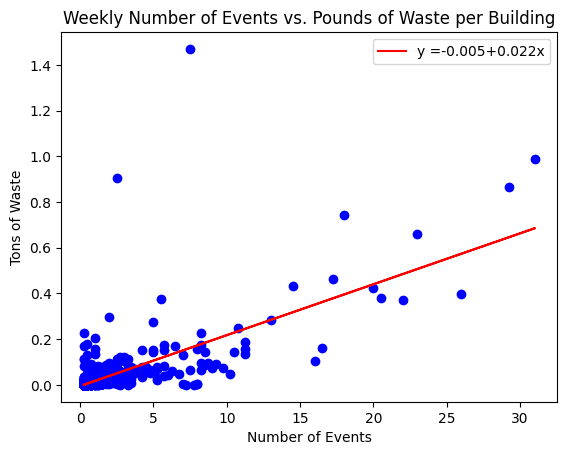

In [35]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

plt.scatter(groups[('Lbs Waste Weekly', 'count')],groups[('Tons Waste Weekly', 'sum')], color='blue')
plt.xlabel("Number of Events")
plt.ylabel("Tons of Waste")
plt.title("Weekly Number of Events vs. Pounds of Waste per Building")



res = stats.linregress(groups[('Lbs Waste Weekly', 'count')], groups[('Tons Waste Weekly', 'sum')])
equation = "y =" + str(np.round(res.intercept,3)) + "+" + str(np.round(res.slope,3)) + "x"
plt.plot(groups[('Lbs Waste Weekly', 'count')], res.intercept + res.slope*groups[('Lbs Waste Weekly', 'count')], 'r', label=equation)
plt.legend()
plt.show()

In [36]:
regression_prediction = (0.5+0.003)/0.022
print("Regression Prediction: \nWeekly tons of waste = " + str(np.round(res.intercept,3)) + "+" + str(np.round(res.slope,3)) + " * Number of Events")
print("0.5 = " + str(np.round(res.intercept,3)) + "+" + str(np.round(res.slope,3)) + "x")
print("x = " + str(regression_prediction))

Regression Prediction: 
Weekly tons of waste = -0.005+0.022 * Number of Events
0.5 = -0.005+0.022x
x = 22.863636363636363


In [37]:
actual_prediction = np.mean([regression_prediction, prediction])
actual_prediction

22.30681818181818

## Using the event duration and the number of people present at each event, it is predicted that roughly 22 events in one week, or 4.4 per day would push a building over the ½ ton food waste ban threshold

In [38]:
#pip install -U scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#Meal per duration , 24 hrs - 4 
def buildinglist(df_name,dur_col):
    unique_values_list = []
    for value in df_name[dur_col]:
        if value not in unique_values_list:
            unique_values_list.append(value)
    return np.array(unique_values_list)

blist = np.array(buildinglist(data,"Street Address"))
columne = np.array(["Event Duration (hrs)","Number of Meals","Guest Count"])


#multiple Linear regression 
def lin_regress(df_name,df_col,waste_col, building):
    X = []
    y = []
    for i in range(len(df_name)):
        if df_name["Street Address"].iloc[i] == building:
            X = np.append(X,df_name[df_col].iloc[i],axis=0)
            y = np.append(y,df_name[waste_col].iloc[i],axis=0)
            #print(X.reshape(-1,1),y.reshape(-1,1))
    X_train,X_test,y_train,y_test=train_test_split(X.reshape(-1,1),y.reshape(-1,1))#test_size=0.4)
    reg = LinearRegression().fit(X_train.reshape(-1,1),y_train.reshape(-1,1))
    #print(reg.score())
    y_pred=reg.predict(X_test.reshape(-1,1))
    #reg.predict(np.array([["TON"]])) #Write code to find it when its a ton

    #Decision tree regressor

def tree_regress(df_name,df_col,waste_col, building):
    X = []
    y = []
    for i in range(len(df_name)):
        if df_name["Street Address"].iloc[i] == building:
            X =np.append(X, df_name[df_col].iloc[i],axis=0)
            y =np.append(y, df_name[waste_col].iloc[i],axis=0)
    X_train,X_test,y_train,y_test=train_test_split(X,y)#test_size=0.4)
    treg =  DecisionTreeRegressor(random_state=0).fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
    #treg.score()
    y_pred=treg.predict(X_test.reshape(-1,1)) #code to find y value of 1000 based on some x (2222?) 
    
    

for i in blist:
    #print(i)
    for j in columne:
        #print(j)
        lin_regress(data,j,"Lbs Waste", i)
        tree_regress(data,j,"Lbs Waste", i)
        
#lin_regress(data,"Event Duration (hrs)", "Lbs Waste", groups["Street Address"])


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 0 dimension(s)